**PYSPARK ASSIGNMENT 03 FEBRUARY, 2023**

**Tasks for the week:** 

1.   Calculate the distance of each trip using haversine library
2.   Calculate the duration in seconds of each trip and add the result to the dataset
3.   By assuming that each minute costs 0.35 cent, calculate the fee for each trip

In [12]:
#install pyspark
#!pip install pyspark

In [7]:
import pyspark
from pyspark.sql import SparkSession, Row, functions as f
from pyspark.sql.window import Window
from pyspark.sql.types import StringType, TimestampType, DoubleType, FloatType, IntegerType, LongType, StructField, StructType
from IPython.display import Image

import random
random.seed(1990)

In [8]:
import pyspark
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName("bike").getOrCreate()
df = spark.read.option("header","true").csv('Downloads/2017-fordgobike-tripdata.csv')

KeyboardInterrupt: 

In [23]:
from pyspark.sql.functions import udf
from pyspark.sql.types import DoubleType
import haversine
from pyspark.sql import SparkSession

In [ ]:
spark = SparkSession.builder.appName("tripdata").getOrCreate()  # starting session


data = spark.read.option("header", True).csv('Downloads/2017-fordgobike-tripdata.csv', inferSchema=True) #imporitng dataset

#df.show()

data.columns

In [ ]:
SparkSession.builder.master('local[1]').appName("gobike").getOrCreate()
data = spark.read.option("header","true").csv('Downloads/2017-fordgobike-tripdata.csv')

In [10]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import numpy as np

path = 'Downloads/2017-fordgobike-tripdata.csv'

df = pd.read_csv(path)

df

,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,pyment
0,57:39.7,12:50.2,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male,credit card
1,56:34.8,49:55.6,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female,credit card
2,45:48.4,28:36.9,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN,credit card
3,31:10.6,47:23.5,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN,credit card
4,23:14.0,29:57.6,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female,app wallet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519695,00:54.5,08:10.4,81,Berry St at 4th St,37.775880,-122.393170,45,5th St at Howard St,37.781752,-122.405127,400,Subscriber,1991.0,Male,credit card
519696,56:39.6,03:51.1,66,3rd St at Townsend St,37.778742,-122.392741,321,5th at Folsom,37.780146,-122.403071,316,Subscriber,1973.0,Male,credit card
519697,47:36.3,54:41.2,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,48,2nd St at S Park St,37.782411,-122.392706,240,Subscriber,1985.0,Female,app wallet
519698,47:41.7,53:47.7,58,Market St at 10th St,37.776619,-122.417385,59,S Van Ness Ave at Market St,37.774814,-122.418954,669,Subscriber,1981.0,Male,app wallet


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   start_time               519700 non-null  object 
 1   end_time                 519700 non-null  object 
 2   start_station_id         519700 non-null  int64  
 3   start_station_name       519700 non-null  object 
 4   start_station_latitude   519700 non-null  float64
 5   start_station_longitude  519700 non-null  float64
 6   end_station_id           519700 non-null  int64  
 7   end_station_name         519700 non-null  object 
 8   end_station_latitude     519700 non-null  float64
 9   end_station_longitude    519700 non-null  float64
 10  bike_id                  519700 non-null  int64  
 11  user_type                519700 non-null  object 
 12  member_birth_year        453159 non-null  float64
 13  member_gender            453238 non-null  object 
 14  pyme

In [22]:
# convert time columns to datetime starting from minutes
df['start_time'] = pd.to_datetime(df['start_time'], format='%M:%S').apply(lambda dt: f"{dt.minute:02d}:{dt.second:02d}")
df['end_time'] = pd.to_datetime(df['end_time'], format='%M:%S').apply(lambda dt: f"{dt.minute:02d}:{dt.second:02d}")

ValueError: unconverted data remains: .7

In [17]:
#convert time columns to datetime
df['start_time'] = pd.to_datetime(df['start_time'])#.groupby(level=0).shift(-1)
df['end_time'] = pd.to_datetime(df['end_time'])

ParserError: hour must be in 0..23: 57:39.7

DATA CLEANING

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   start_time               519700 non-null  object 
 1   end_time                 519700 non-null  object 
 2   start_station_id         519700 non-null  int64  
 3   start_station_name       519700 non-null  object 
 4   start_station_latitude   519700 non-null  float64
 5   start_station_longitude  519700 non-null  float64
 6   end_station_id           519700 non-null  int64  
 7   end_station_name         519700 non-null  object 
 8   end_station_latitude     519700 non-null  float64
 9   end_station_longitude    519700 non-null  float64
 10  bike_id                  519700 non-null  int64  
 11  user_type                519700 non-null  object 
 12  member_birth_year        453159 non-null  float64
 13  member_gender            453238 non-null  object 
 14  pyme

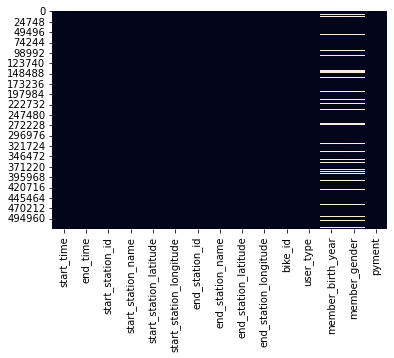

In [3]:
# check for null values
df.info()

# visualizing missing values
sns.heatmap(df.isna(),cbar=False)

plt.show()

In [4]:
# other general info
df.describe()

,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,453159.000000
mean,95.034245,37.771653,-122.363927,92.184041,37.771844,-122.363236,1672.533079,1980.404787
std,86.083078,0.086305,0.105573,84.969491,0.086224,0.105122,971.356959,10.513488
min,3.000000,37.317298,-122.444293,3.000000,37.317298,-122.444293,10.000000,1886.000000
25%,24.000000,37.773492,-122.411726,23.000000,37.774520,-122.410345,787.000000,1974.000000
50%,67.000000,37.783521,-122.398870,66.000000,37.783830,-122.398525,1728.500000,1983.000000
75%,139.000000,37.795392,-122.391034,134.000000,37.795392,-122.391034,2520.000000,1988.000000
max,340.000000,37.880222,-121.874119,340.000000,37.880222,-121.874119,3733.000000,1999.000000


Note: The missing values are found in the 'member_gender' and the 'member_birth_year' columns. We'll replace the values in the 'member_gender' column with the values immediately above the row in each case. Using the mode is another option, but since the missing rows are over 50,000 in each case, making the same entry for this number of times is not the wise thing to do here. For the 'member_birth_year' column however, we'll replace the missing values with the modal value of the birth year in the dataset.

In [5]:
# check for duplicates
df[df.duplicated()]

# the dataset contains no duplicates


,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,pyment


In [6]:
# replace missing values

df1 = df.fillna(method = 'pad')

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   start_time               519700 non-null  object 
 1   end_time                 519700 non-null  object 
 2   start_station_id         519700 non-null  int64  
 3   start_station_name       519700 non-null  object 
 4   start_station_latitude   519700 non-null  float64
 5   start_station_longitude  519700 non-null  float64
 6   end_station_id           519700 non-null  int64  
 7   end_station_name         519700 non-null  object 
 8   end_station_latitude     519700 non-null  float64
 9   end_station_longitude    519700 non-null  float64
 10  bike_id                  519700 non-null  int64  
 11  user_type                519700 non-null  object 
 12  member_birth_year        519700 non-null  float64
 13  member_gender            519700 non-null  object 
 14  pyme

In [7]:
df1.head()

,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,pyment
0,57:39.7,12:50.2,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male,credit card
1,56:34.8,49:55.6,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female,credit card
2,45:48.4,28:36.9,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,1965.0,Female,credit card
3,31:10.6,47:23.5,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,1965.0,Female,credit card
4,23:14.0,29:57.6,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female,app wallet


**Task 1: Calculate the distance of each trip using haversine library**

In [21]:
# install haversine

!pip install haversine

In [8]:
import numpy as np

def haversine_vectorize(lon1, lat1, lon2, lat2):

    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    newlon = lon2 - lon1
    newlat = lat2 - lat1

    haver_formula = np.sin(newlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(newlon/2.0)**2

    dist = 2 * np.arcsin(np.sqrt(haver_formula ))
    km = 6367 * dist #6367 for distance in KM for miles use 3958
    return km

In [9]:
haversine_vectorize(df1['start_station_longitude'],df1['start_station_latitude'],df1['end_station_longitude'],
                   df1['end_station_latitude'])

0         0.942337
1         3.067799
2         0.000000
3         1.045966
4         0.635940
            ...   
519695    1.236409
519696    0.920616
519697    1.072079
519698    0.243362
519699    0.702018
Length: 519700, dtype: float64

In [10]:
df1['haversine_dist'] = haversine_vectorize(df1['start_station_longitude'],df1['start_station_latitude'],df1['end_station_longitude'],df1['end_station_latitude'])

df1

,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,pyment,haversine_dist
0,57:39.7,12:50.2,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male,credit card,0.942337
1,56:34.8,49:55.6,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female,credit card,3.067799
2,45:48.4,28:36.9,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,1965.0,Female,credit card,0.000000
3,31:10.6,47:23.5,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,1965.0,Female,credit card,1.045966
4,23:14.0,29:57.6,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female,app wallet,0.635940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519695,00:54.5,08:10.4,81,Berry St at 4th St,37.775880,-122.393170,45,5th St at Howard St,37.781752,-122.405127,400,Subscriber,1991.0,Male,credit card,1.236409
519696,56:39.6,03:51.1,66,3rd St at Townsend St,37.778742,-122.392741,321,5th at Folsom,37.780146,-122.403071,316,Subscriber,1973.0,Male,credit card,0.920616
519697,47:36.3,54:41.2,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,48,2nd St at S Park St,37.782411,-122.392706,240,Subscriber,1985.0,Female,app wallet,1.072079
519698,47:41.7,53:47.7,58,Market St at 10th St,37.776619,-122.417385,59,S Van Ness Ave at Market St,37.774814,-122.418954,669,Subscriber,1981.0,Male,app wallet,0.243362


**Task 2. Calculate the duration in seconds of each trip and add the result to the dataset**

In [ ]:
#2-calculate the duration in seconds of each trip
from pyspark.sql.functions import *
from pyspark.sql.types import TimestampType
df = df.withColumn("starttime", unix_timestamp(col("start_time"), "mm:ss.S").cast(TimestampType()))
df = df.withColumn("endtime", unix_timestamp(col("end_time"), "mm:ss.S").cast(TimestampType()))
df = df.withColumn("duration", expr("if((unix_timestamp(endtime) - unix_timestamp(starttime)) >= 0, (unix_timestamp(endtime) - unix_timestamp(starttime)), (unix_timestamp(endtime) + 3600 - unix_timestamp(starttime)))").cast("integer"))
df.select(["starttime","endtime","duration"]).show()

In [9]:
df1.columns

NameError: name 'df1' is not defined

In [14]:
#convert time columns to datetime
df1['start_time'] = pd.to_datetime(df1['start_time']).groupby(level=0).shift(-1)
df1['end_time'] = pd.to_datetime(df1['end_time'])

#subtract, remove first missing values per groups and set column from index
df = df['startTime'].sub(df['endTime']).dropna().reset_index(name='time')
print (df)


KeyboardInterrupt: 

In [15]:
from pyspark.sql.functions import *
from pyspark.sql.types import TimestampType
df = df.withColumn("starttime", unix_timestamp(col("start_time"), "mm:ss.S").cast(TimestampType()))
df = df.withColumn("endtime", unix_timestamp(col("end_time"), "mm:ss.S").cast(TimestampType()))
df = df.withColumn("duration", expr("if((unix_timestamp(endtime) - unix_timestamp(starttime)) >= 0, (unix_timestamp(endtime) - unix_timestamp(starttime)), (unix_timestamp(endtime) + 3600 - unix_timestamp(starttime)))").cast("integer"))
df.select(["starttime","endtime","duration"]).show()

AttributeError: 'DataFrame' object has no attribute 'withColumn'

**Task 3: By assuming that each minute costs 0.35 cent, calculate the fee for each trip.**

In [ ]:
df = df.withColumn("duration", expr("if((unix_timestamp(endtime) - unix_timestamp(starttime)) >= 0, (unix_timestamp(endtime) - unix_timestamp(starttime)), (unix_timestamp(endtime) + 3600 - unix_timestamp(starttime)))").cast("timestamp"))
df = df.withColumn("duration_second", minute(col("duration")))
df = df.withColumn("fee_of_trip", bround(col("duration_second") * 0.35, 2))
df.select(["duration_second","fee_of_trip"]).show()

In [2]:
import pyspark
from pyspark.sql import SparkSession


In [6]:
SparkSession.builder.master('local[1]').appName("gobike").getOrCreate()
data = spark.read.option("header","true").csv('Downloads/2017-fordgobike-tripdata.csv')

KeyboardInterrupt: 

In [ ]:
spark = SparkSession.builder.appName("tripdata").getOrCreate()  # starting session


data = spark.read.option("header", True).csv('Downloads/2017-fordgobike-tripdata.csv', inferSchema=True) #imporitng dataset

#df.show()

df.columns